In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os
%matplotlib inline

from scipy import misc

In [2]:
import sys
sys.path.append('/home/albert/github/DenseNet/')
import densenet
sys.path.append('/home/albert/github/tensorflow/src/')
import triplet
import evaluation
import data
import dense

Using TensorFlow backend.


In [3]:
train_dict, train_files = data.get_data('train', keypoints=['Neck'])

preprocess False
keypoints ['Neck']
1.09202384949


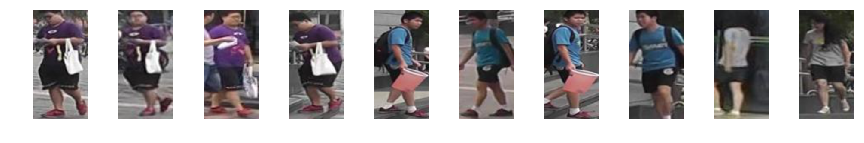

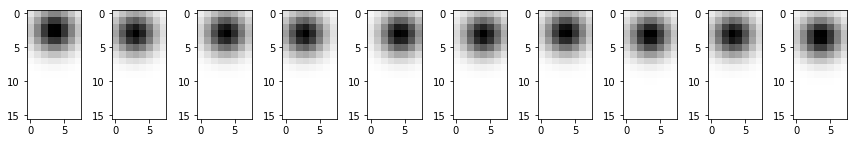

In [32]:
start = time.time()
batch = data.output_batch_generator(train_dict, P=8, preprocess=False,
                                    shape=(256,128), keypoints=['Neck'], r=0.6,
                                    cam_output_dim=(16,8), cam_wide=False, crop=False).next()
print time.time() - start

plt.figure(figsize=(15,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(batch[0]['input_im'][i].astype(np.uint8))
    plt.axis('off')
plt.show()

import cv2
plt.figure(figsize=(15,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    im = cv2.resize(batch[1]['cam_output'][i].squeeze(), (8,16))
    plt.imshow(im, cmap=plt.cm.gray)
    plt.axis('on')
plt.show()

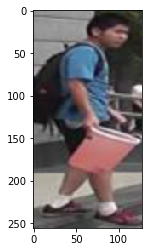

In [33]:
f = train_files[100][0]
# im = data.imread_scale(f, (256,128), preprocess=False)
im = batch[0]['input_im'][4]
plt.imshow(im.astype(np.uint8))

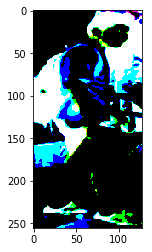

In [34]:
# root = 'im1'
# os.system('mkdir /home/albert/Desktop/fig/cam/%s' % root)
# misc.imsave('/home/albert/Desktop/fig/cam/%s/im.png' % root, im.astype(np.uint8))

preprocess = densenet.preprocess_input(im.copy())
# misc.imsave('/home/albert/Desktop/fig/cam/%s/preprocess.png' % root, preprocess.astype(np.uint8))
plt.imshow(preprocess.astype(np.uint8))

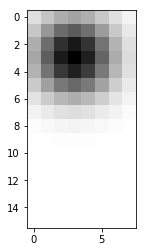

In [35]:
htmp = np.ones((16,8)) - data.create_keypoints(f, shape=(16,8), keypoints=['Neck'])
# misc.imsave('/home/albert/Desktop/fig/cam/%s/htmp_ankle.png' % root, cv2.resize(htmp.squeeze(), (64,128), interpolation=cv2.INTER_NEAREST))
plt.imshow(htmp, cmap=plt.cm.gray)

In [30]:
camnet = evaluation.load_cam_model('/home/albert/github/tensorflow/pre3/models/neck_cam_inverse_aws/neck_cam_inverse_aws_9000.npy')

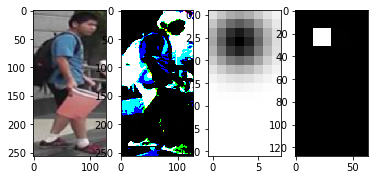

In [36]:
cam = camnet.predict(preprocess.reshape((1,256,128,3)))[1][0]

plt.subplot(141)
plt.imshow(im.astype(np.uint8))
plt.subplot(142)
plt.imshow(preprocess.astype(np.uint8))
plt.subplot(143)
plt.imshow(htmp, cmap=plt.cm.gray)
plt.subplot(144)
plt.imshow(cv2.resize(cam, (64,128), interpolation=cv2.INTER_NEAREST), cmap=plt.cm.gray)
plt.show()

In [52]:
misc.imsave('/home/albert/Desktop/fig/cam/%s/cam_hip_map.png' % root, cv2.resize(cam, (64,128), interpolation=cv2.INTER_NEAREST))